In [39]:
import warnings
warnings.filterwarnings('ignore')
import zipfile

# Use correct path (remove 'data/')
with zipfile.ZipFile("1950-2018-torn-aspath.zip", 'r') as zip_ref:
    zip_ref.extractall("data/tornado_path")  # Extracts to a folder
    print(zip_ref.namelist())  # Shows file names inside

['1950-2018-torn-aspath/', '1950-2018-torn-aspath/1950-2018-torn-aspath.dbf', '1950-2018-torn-aspath/1950-2018-torn-aspath.cpg', '1950-2018-torn-aspath/1950-2018-torn-aspath.shp', '1950-2018-torn-aspath/1950-2018-torn-aspath.shx', '1950-2018-torn-aspath/1950-2018-torn-aspath.prj']


In [18]:
# Dataset Preview
# This dataset contains tornado path information from 1950 to 2018,
# including coordinates, dates, state abbreviations, length, and width of tornadoes.
tornado_paths.head(10)

# Dataset Info
# Displays column names, data types, and non-null value counts.
tornado_paths.info()

# Descriptive Statistics
# Summary statistics for numeric columns (mean, min, max, std, etc.)
tornado_paths.describe()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 63645 entries, 0 to 63644
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   om        63645 non-null  int64   
 1   yr        63645 non-null  int64   
 2   mo        63645 non-null  int64   
 3   dy        63645 non-null  int64   
 4   date      63645 non-null  object  
 5   time      63645 non-null  object  
 6   tz        63645 non-null  int64   
 7   st        63645 non-null  object  
 8   stf       63645 non-null  int64   
 9   stn       63645 non-null  int64   
 10  mag       63645 non-null  int64   
 11  inj       63645 non-null  int64   
 12  fat       63645 non-null  int64   
 13  loss      63645 non-null  float64 
 14  closs     63645 non-null  float64 
 15  slat      63645 non-null  float64 
 16  slon      63645 non-null  float64 
 17  elat      63645 non-null  float64 
 18  elon      63645 non-null  float64 
 19  len       63645 non-null  float64 
 20

om            yr            mo           dy            tz  \
count   63645.000000  63645.000000  63645.000000  63645.00000  63645.000000   
mean    72962.799340   1989.582842      5.964679     15.90216      3.001037   
std    182879.885378     18.524891      2.414156      8.77020      0.075202   
min         1.000000   1950.000000      1.000000      1.00000      0.000000   
25%       263.000000   1974.000000      4.000000      8.00000      3.000000   
50%       541.000000   1992.000000      6.000000     16.00000      3.000000   
75%       936.000000   2005.000000      7.000000     24.00000      3.000000   
max    617024.000000   2018.000000     12.000000     31.00000      9.000000   

                stf           stn           mag           inj           fat  \
count  63645.000000  63645.000000  63645.000000  63645.000000  63645.000000   
mean      29.330992     25.007338      0.768356      1.491806      0.092545   
std       15.002736     32.326617      0.991177     18.653265      1.504142   
min        1.000000      0.000000     -9.000000      0.000000      0.000000   
25%       18.000000      3.000000      0.000000      0.000000      0.000000   
50%       28.000000     13.000000      1.000000      0.000000      0.000000   
75%       45.000000     34.000000      1.000000      0.000000      0.000000   
max       72.000000    232.000000      5.000000   1740.000000    158.000000   

               loss         closs          slat          slon          elat  \
count  6.364500e+04  6.364500e+04  63645.000000  63645.000000  63645.000000   
mean   2.332516e+04  3.408607e+02     37.148112    -92.881544     37.167191   
std    1.663003e+06  3.237268e+04      5.118261      8.698965      5.116789   
min    0.000000e+00  0.000000e+00     18.130000   -163.530000     18.130000   
25%    0.000000e+00  0.000000e+00     33.220000    -98.530000     33.230100   
50%    1.000000e-01  0.000000e+00     37.080000    -93.780000     37.100000   
75%    4.000000e+00  0.000000e+00     40.970000    -86.800000     40.980100   
max    3.103000e+08  7.500000e+06     61.020000    -64.900000     61.020000   

               elon           len           wid            fc  
count  63645.000000  63645.000000  63645.000000  63645.000000  
mean     -92.839119      3.461685    102.484846      0.029272  
std        8.707359      8.360559    200.202890      0.168569  
min     -163.530000      0.000000      0.000000      0.000000  
25%      -98.500000      0.100000     17.000000      0.000000  
50%      -93.729900      0.700000     50.000000      0.000000  
75%      -86.740000      3.000000    100.000000      0.000000  
max      -64.900000    234.700000   4576.000000      1.000000

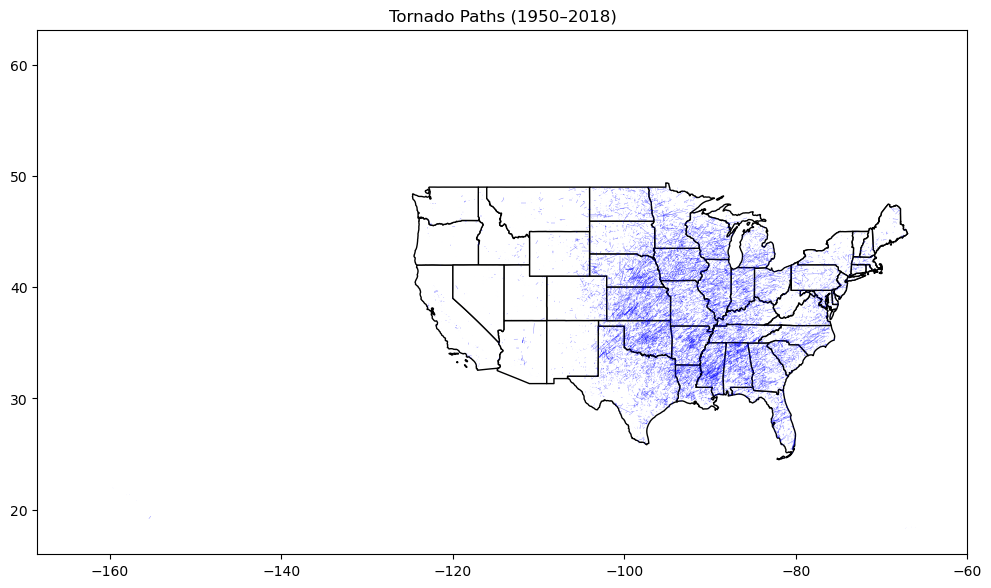

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load U.S. state boundaries 
states_gdf = gpd.read_file("usa-states-census-2014.shp")
contiguous = states_gdf[~states_gdf['STUSPS'].isin(['AK', 'HI'])]

# Load tornado path 
tornado_paths = gpd.read_file("data/tornado_path/1950-2018-torn-aspath/1950-2018-torn-aspath.shp")

# Plot the tornado paths over the U.S. map
fig, ax = plt.subplots(figsize=(12, 8))
contiguous.plot(ax=ax, color='white', edgecolor='black')
tornado_paths.plot(ax=ax, color='blue', linewidth=0.3, alpha=0.5)
ax.set_title("Tornado Paths (1950–2018)")
plt.savefig("CindyChitsuwa_TornadoPaths.png")
plt.show()


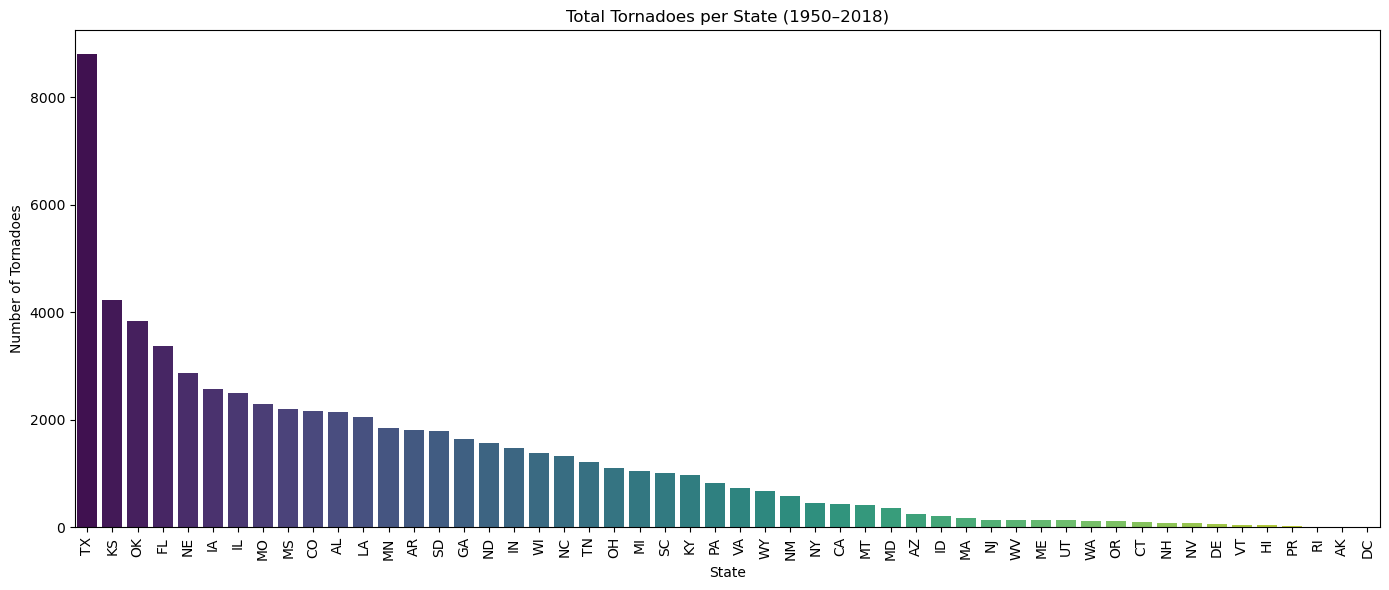

In [41]:


# Count tornadoes per state using 'st'
state_counts = tornado_paths['st'].value_counts().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title("Total Tornadoes per State (1950–2018)")
plt.xlabel("State")
plt.ylabel("Number of Tornadoes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("CindyChitsuwa_TotalTornadoesPerState.png")
plt.show()


This histogram shows how long tornadoes typically are. Most are short, with a few rare long tracks.

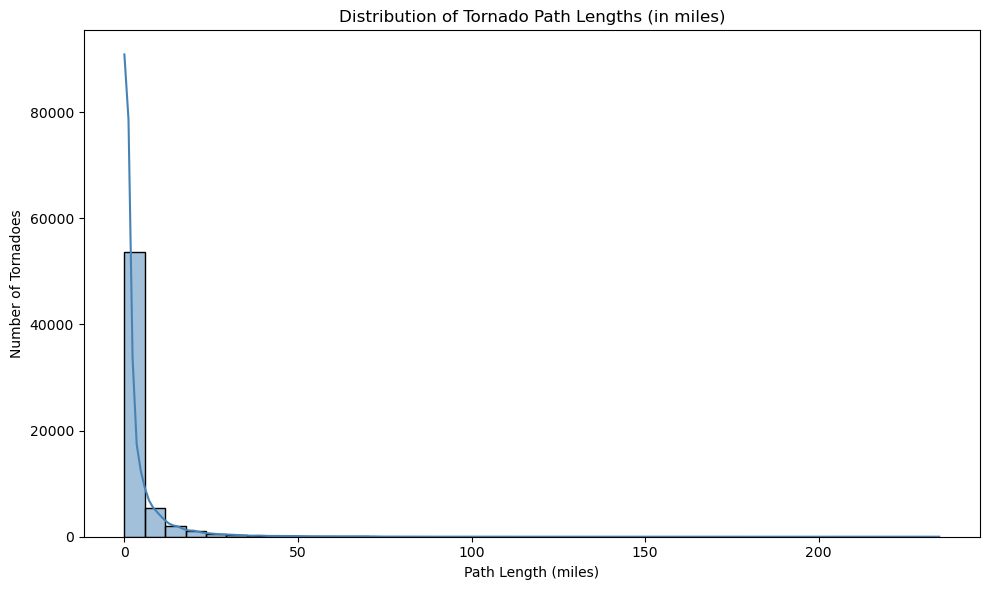

In [22]:
# Histogram of tornado path lengths
plt.figure(figsize=(10, 6))
sns.histplot(tornado_paths['len'], bins=40, color='steelblue', kde=True)
plt.title("Distribution of Tornado Path Lengths (in miles)")
plt.xlabel("Path Length (miles)")
plt.ylabel("Number of Tornadoes")
plt.tight_layout()
plt.savefig("CindyChitsuwa_TornadoLengthDistribution.png")
plt.show()

This bar chart displays the average tornado width in each state. It helps identify where tornadoes tend to be wider.


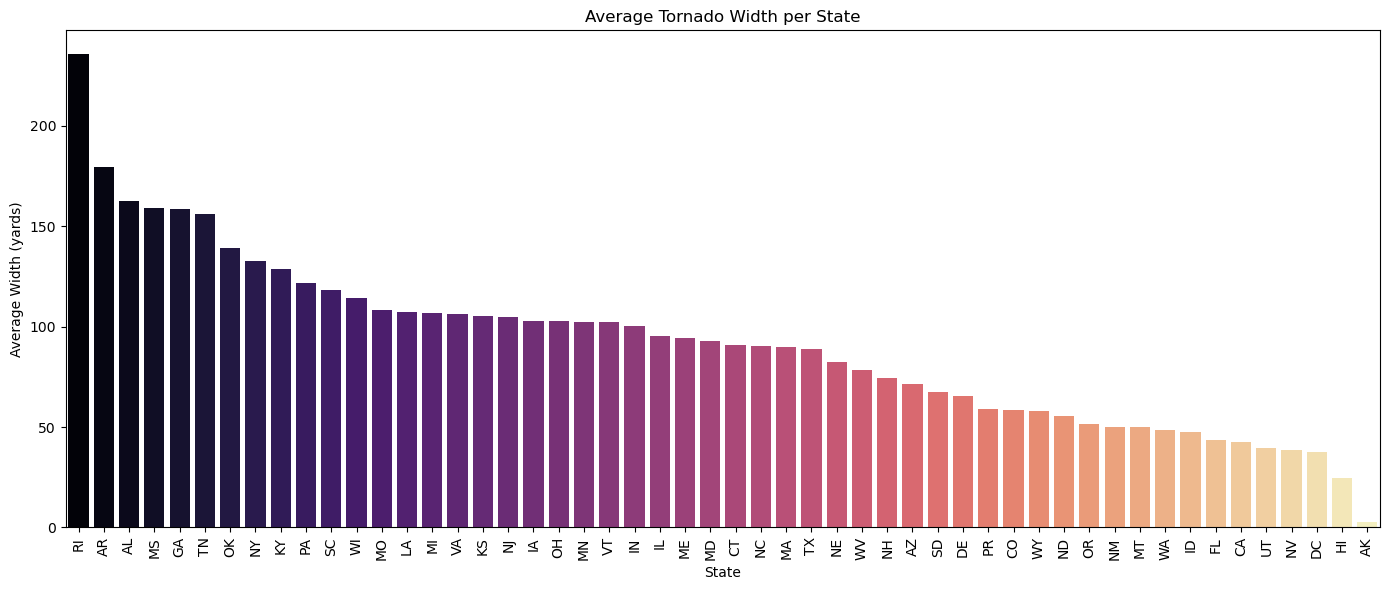

In [43]:
avg_width = tornado_paths.groupby('st')['wid'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=avg_width.index, y=avg_width.values, palette='magma')
plt.title("Average Tornado Width per State")
plt.xlabel("State")
plt.ylabel("Average Width (yards)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("CindyChitsuwa_AvgTornadoWidthPerState.png")
plt.show()

This line chart shows the number of tornadoes recorded each year. It can reveal trends or reporting changes over time.

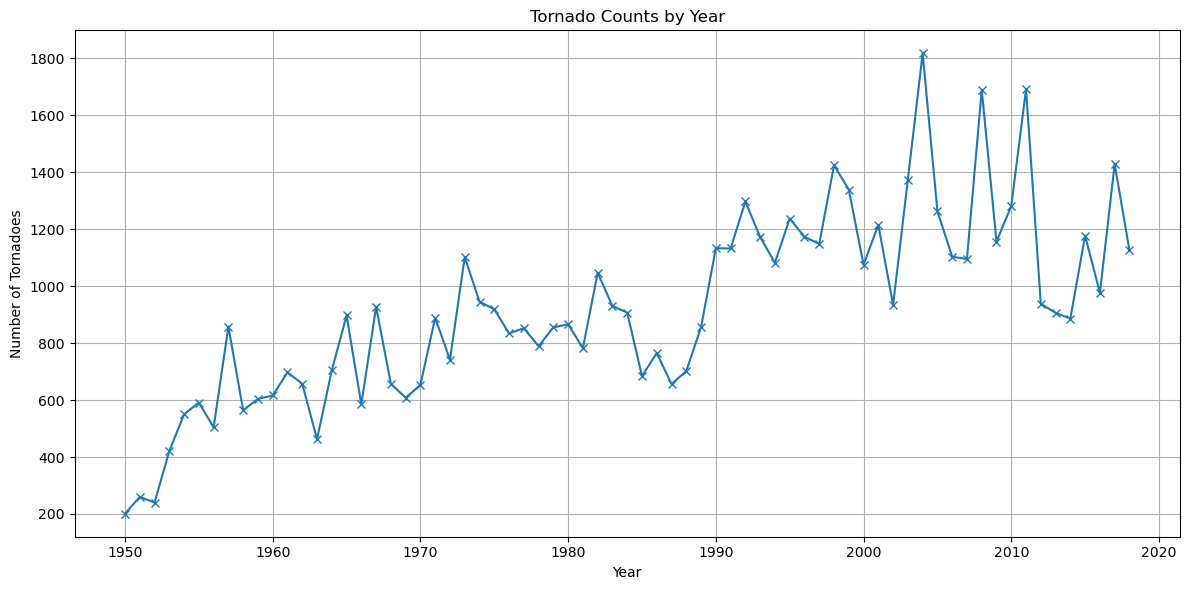

In [28]:
yearly_counts = tornado_paths['yr'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='x', linestyle='-')
plt.title("Tornado Counts by Year")
plt.xlabel("Year")
plt.ylabel("Number of Tornadoes")
plt.grid(True)
plt.tight_layout()
plt.savefig("CindyChitsuwa_TornadoCountsByYear.png")
plt.show()

This heatmap shows how different tornado variables (like fatalities, injuries, length, and width) are correlated with each other.

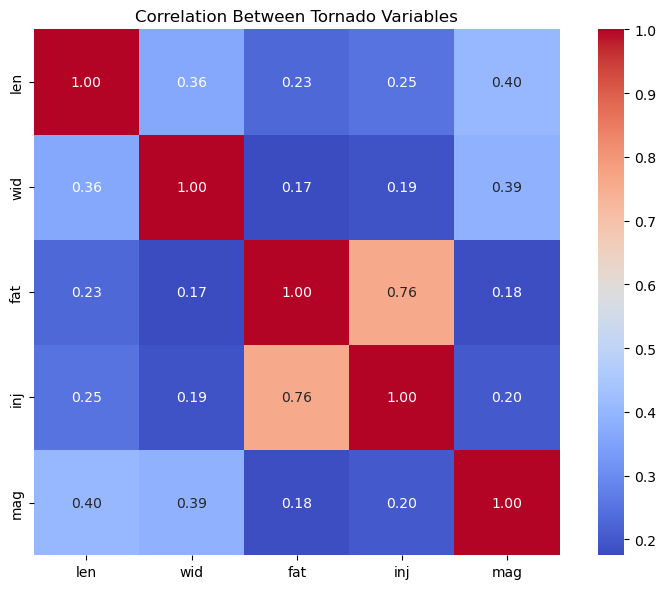

In [34]:
# Select relevant numeric columns
corr_data = tornado_paths[['len', 'wid', 'fat', 'inj', 'mag']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Between Tornado Variables")
plt.tight_layout()
plt.savefig("CindyChitsuwa_TornadoVariableCorrelation.png")
plt.show()